# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


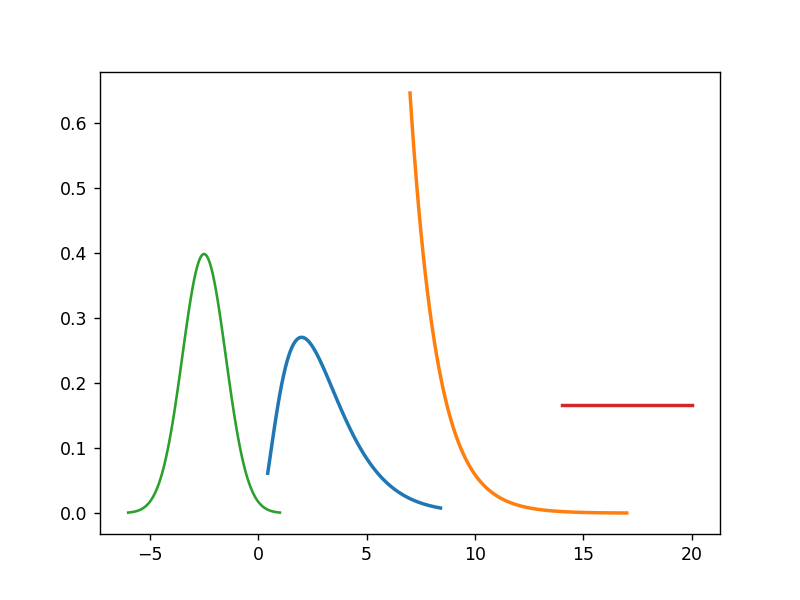

<IPython.core.display.Javascript object>


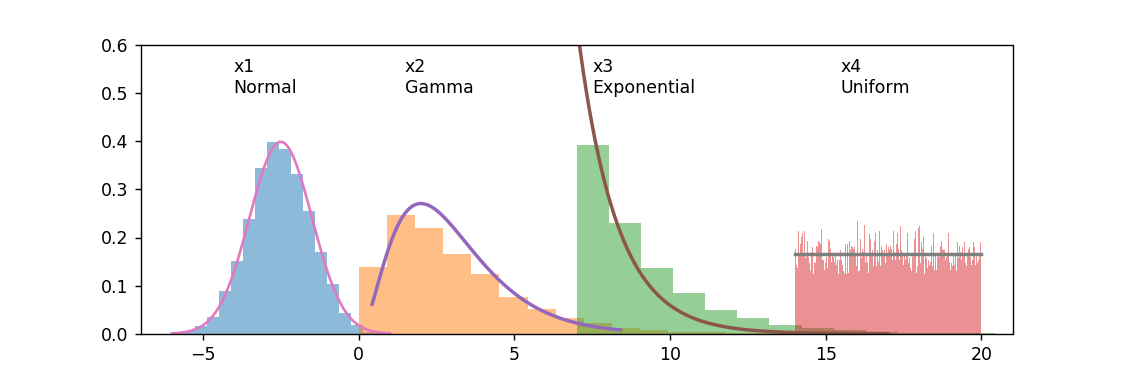

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.mlab as mlab
import math

%matplotlib notebook

import scipy.stats as ss


# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000) +7
x4 = np.random.uniform(14,20, 10000)


a = 1.99323054838
a = 3.0
rv = ss.gamma(a)
x_gamma = np.linspace(ss.gamma.ppf(0.01, a), ss.gamma.ppf(0.99, a), 100)

mu = -2.5
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-6, 1, 100)

#  exp curve
x_exp = np.linspace(7, 17, 100)
rv2 = ss.expon()

# standard uniform distribution 
x_x4 = np.linspace(14,20,100)
y_x4 = np.empty(len(x_x4)); y_x4 .fill(1.0 / (20-14))

plt.plot(x_gamma, rv.pdf(x_gamma), lw=2)
plt.plot(x_exp, rv2.pdf(x_gamma), lw=2)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.plot(x_x4, y_x4, lw=2)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=200, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.plot(x_gamma, rv.pdf(x_gamma), lw=2)
plt.plot(x_exp, rv2.pdf(x_gamma), lw=2)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.plot(x_x4, y_x4, lw=2)


plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


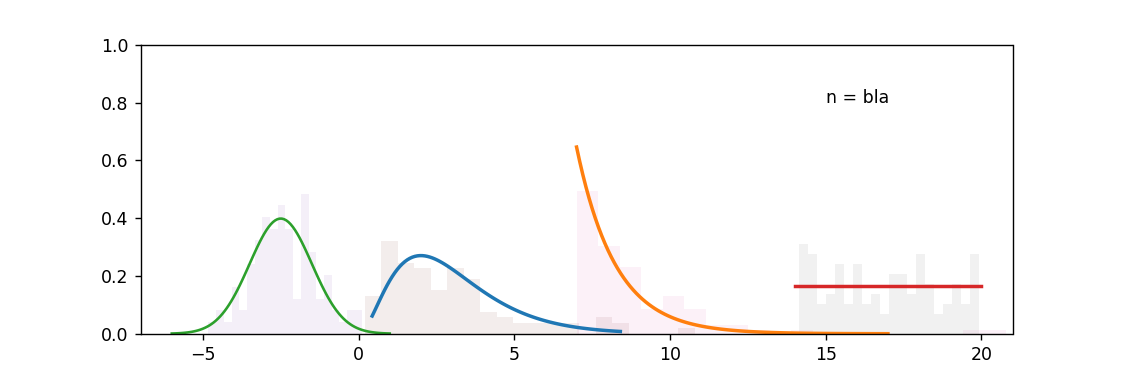

In [107]:
from IPython.html.widgets import interact, interactive, fixed

my_limit = 99
my_sample = 10

mu1 = -2.5
variance1 = 1
sigma1 = math.sqrt(variance1)
norm1 = np.linspace(-6, 1, 100)


    
def sample_size(x:int=None):
    return 100

def data():
    cnt = 0
    while cnt <= my_limit:
        cnt += 1
        yield np.random.choice(x1,sample_size()),np.random.choice(x2,sample_size()),np.random.choice(x3,(sample_size())),np.random.choice(x4,sample_size())

def draw_outline():
    a = 3.0
    rv = ss.gamma(a)
    x_gamma = np.linspace(ss.gamma.ppf(0.01, a), ss.gamma.ppf(0.99, a), 100)

    mu = -2.5
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(-6, 1, 100)

    #  exp curve
    x_exp = np.linspace(7, 17, 100)
    rv2 = ss.expon()

    # standard uniform distribution 
    x_x4 = np.linspace(14,20,100)
    y_x4 = np.empty(len(x_x4)); y_x4 .fill(1.0 / (20-14))

    plt.plot(x_gamma, rv.pdf(x_gamma), lw=2)
    plt.plot(x_exp, rv2.pdf(x_gamma), lw=2)
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.plot(x_x4, y_x4, lw=2)
    

def run(data):
    x1,x2,x3, x4 = data
    plt.cla()
    draw_outline()
    #plt.plot(norm1,mlab.normpdf(norm1, mu1, sigma1))
    plt.hist(x1, normed=True, bins=20, alpha=0.1)
    plt.hist(x2, normed=True, bins=20, alpha=0.1)
    plt.hist(x3, normed=True, bins=20, alpha=0.1)
    plt.hist(x4, normed=True, bins=20, alpha=0.1)
    plt.axis([-7,21,0,1]);
    plt.annotate('n = {}'.format('bla'), [15,.8])


# plot the histograms
fig= plt.figure(figsize=(9,3))
#plt.hist(x1, normed=True, bins=20, alpha=0.5)
#plt.hist(x2, normed=True, bins=20, alpha=0.5)
#plt.hist(x3, normed=True, bins=20, alpha=0.5)
#plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')




a = animation.FuncAnimation(fig, run, data, interval=10, repeat=False)
#plt.show()




In [65]:
x_x4 = np.linspace(14,20,100)
x_x4.mean()
(x4 - x4.mean()) / (x4.max() - x4.min())

array([-0.12771828, -0.3735335 ,  0.18807146, ...,  0.25477479,
        0.27830702,  0.30437077])

<IPython.core.display.Javascript object>


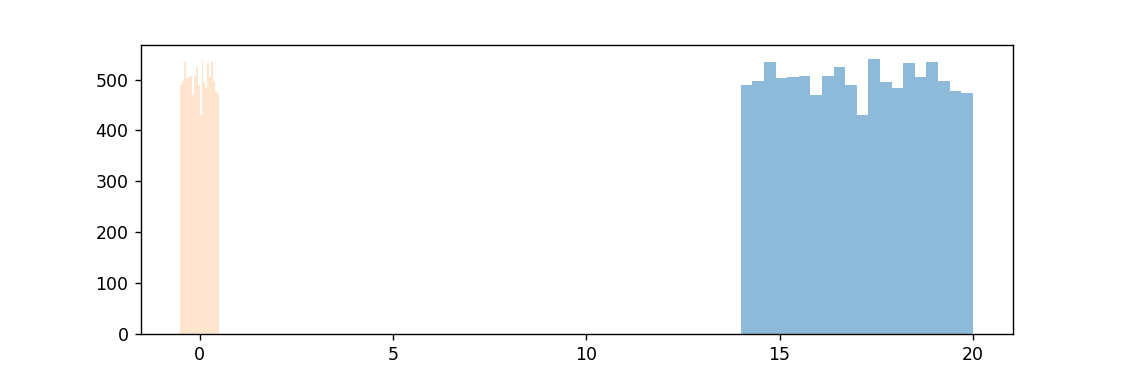

(array([ 489.,  497.,  535.,  503.,  505.,  507.,  470.,  508.,  525.,
         490.,  431.,  541.,  496.,  483.,  532.,  505.,  535.,  497.,
         477.,  474.]),
 array([-0.49867415, -0.44867415, -0.39867415, -0.34867415, -0.29867415,
        -0.24867415, -0.19867415, -0.14867415, -0.09867415, -0.04867415,
         0.00132585,  0.05132585,  0.10132585,  0.15132585,  0.20132585,
         0.25132585,  0.30132585,  0.35132585,  0.40132585,  0.45132585,
         0.50132585]),
 <a list of 20 Patch objects>)

In [71]:
plt.figure(figsize=(9,3))
plt.hist(x4, normed=False, bins=20, alpha=0.5);
plt.hist((x4 - x4.mean()) / (x4.max() - x4.min()), bins= 20, alpha=.2)

In [44]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if 
                str(x)==str(x)[::-1] and 
                str(x**2)==str(x**2)[::-1]))
    return

In [45]:

%%time
slow_function(1e6)

1000000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002]
Wall time: 563 ms


In [46]:

from ipywidgets import FloatSlider
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

6400000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [48]:
from ipywidgets import interact, interactive, fixed, interact_manual
interact_manual(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

3400000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [104]:
def sample_size(x:int=None):
    return 100

def data2():
    cnt = 0
    while cnt <= my_limit:
        cnt += 1
        yield np.random.choice(x1,sample_size()),np.random.choice(x2,sample_size()),np.random.choice(x3,(sample_size())),np.random.choice(x4,sample_size())

def draw_outline2():
    a = 3.0
    rv = ss.gamma(a)
    x_gamma = np.linspace(ss.gamma.ppf(0.01, a), ss.gamma.ppf(0.99, a), 100)

    mu = -2.5
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(-6, 1, 100)

    #  exp curve
    x_exp = np.linspace(7, 17, 100)
    rv2 = ss.expon()

    # standard uniform distribution 
    x_x4 = np.linspace(14,20,100)
    y_x4 = np.empty(len(x_x4)); y_x4 .fill(1.0 / (20-14))

    plt.plot(x_gamma, rv.pdf(x_gamma), lw=2)
    plt.plot(x_exp, rv2.pdf(x_gamma), lw=2)
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.plot(x_x4, y_x4, lw=2)
    

def run2(data):
    print('in run2')
    x1,x2,x3, x4 = data
    plt.cla()
    draw_outline2()
    #plt.plot(norm1,mlab.normpdf(norm1, mu1, sigma1))
    plt.hist(x1, normed=True, bins=20, alpha=0.1)
    plt.hist(x2, normed=True, bins=20, alpha=0.1)
    plt.hist(x3, normed=True, bins=20, alpha=0.1)
    plt.hist(x4, normed=True, bins=20, alpha=0.1)
    plt.axis([-7,21,0,1]);
    plt.annotate('n = {}'.format('bla'), [15,.8])


def create_animation(i):
   
    fig = plt.figure(figsize=(9,3))
    plt.axis([-7,21,0,0.6])

    plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
    plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
    plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
    plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

    a = animation.FuncAnimation(fig, run2, data2, interval=10, repeat=False)
    plt.show()
    print('got here')

<IPython.core.display.Javascript object>


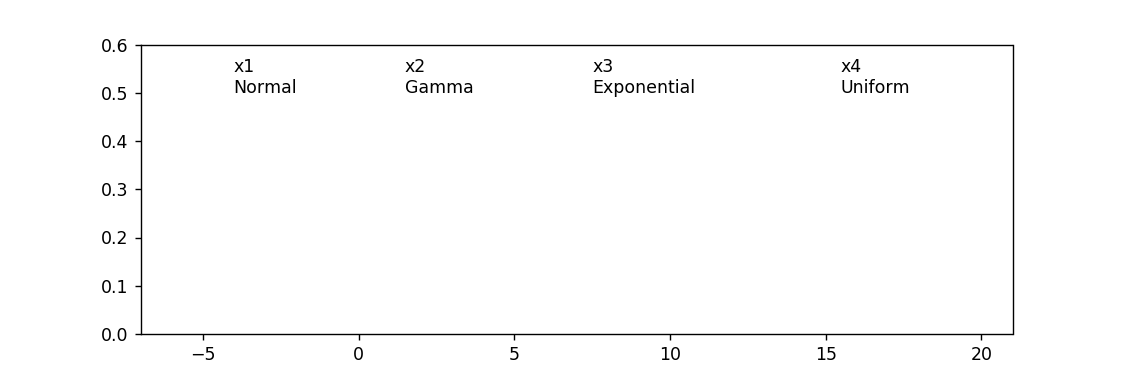

got here


In [105]:
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
#interact_manual(create_animation,i=IntSlider(min=10, max=1000, step=100));
fig = plt.figure(figsize=(9,3))
#a = animation.FuncAnimation(fig, run, data, interval=10, repeat=False)
interact(create_animation,i=IntSlider(min=10, max=1000, step=100));

<IPython.core.display.Javascript object>


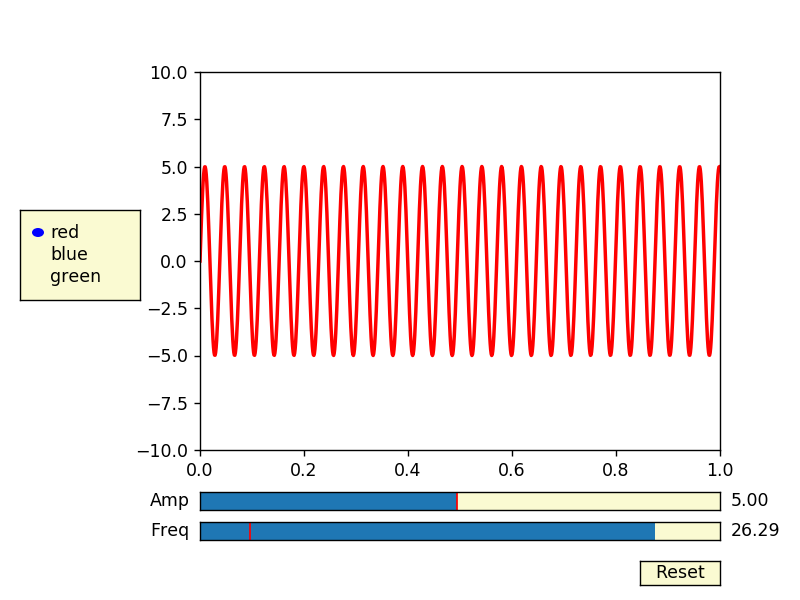

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

<IPython.core.display.Javascript object>


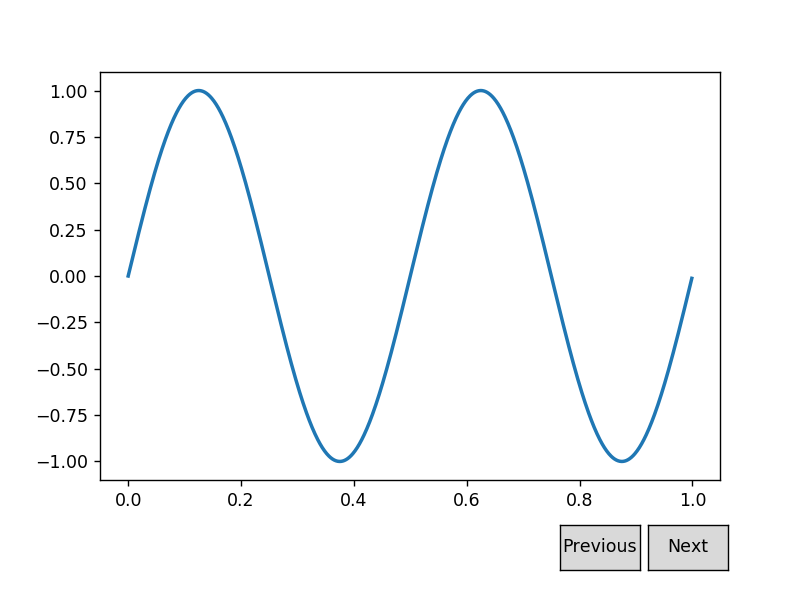

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

<IPython.core.display.Javascript object>


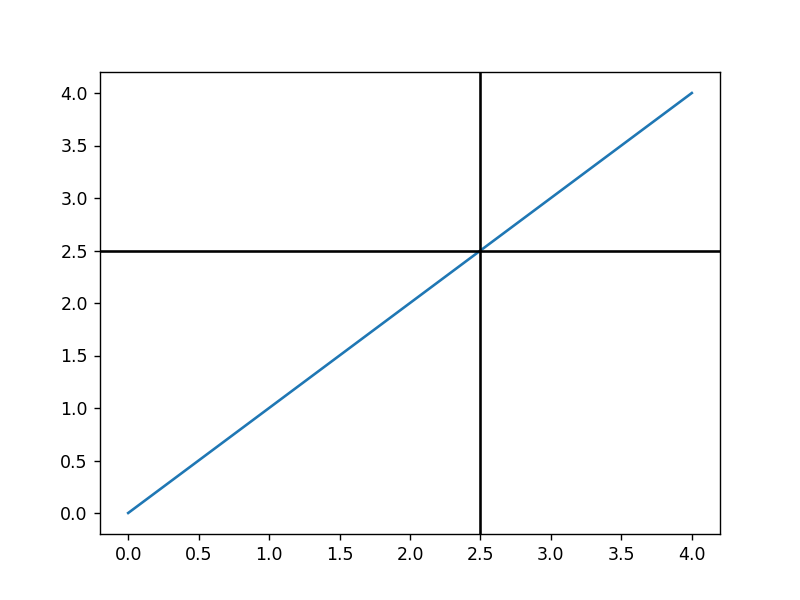

In [74]:
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive

fig, ax = plt.subplots()
ax.plot(range(5))


vline = ax.axvline(1, color='k')
hline = ax.axhline(0.5, color='k')

def set_cursor(x, y):
    vline.set_xdata((x, x))
    hline.set_ydata((y, y))
    ax.figure.canvas.draw_idle()

In [75]:
interactive(set_cursor, x=ax.get_xlim(), y=ax.get_ylim())